In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/cjfghk5697/Public_Wifi_of_factors_weight/main/csv/publicwifi.csv')
df.head()

,population,area,GDP in region,installed,use(TB),user(10000)
0,9766886,605,433488,7399,3669,11039
1,3431750,770,92445,2517,2081,5164
2,2454154,884,57756,1617,447,808
3,2956700,1063,89571,1044,97,2289
4,1458940,501,41146,1016,743,1368


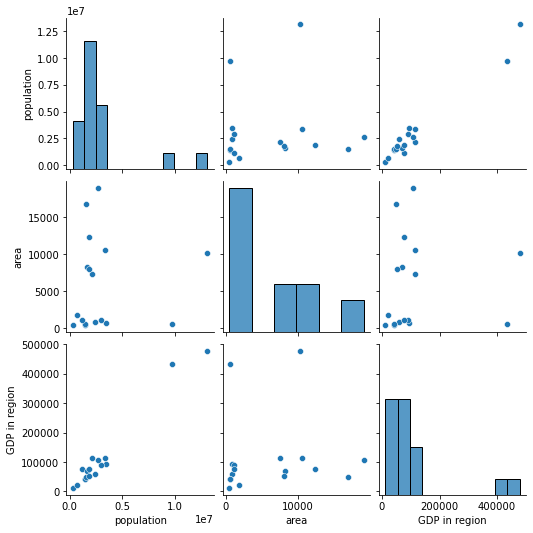

In [24]:
sns.pairplot(df[['population', 'area', 'GDP in region']]);

In [25]:
df['intercept'] = 1
lm = sm.OLS(df['installed'], df[['intercept', 'population', 'area', 'GDP in region']])
results = lm.fit()
results.summary()

C:\Users\cjfgh\anaconda3\envs\project1\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              installed   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.164
Date:                Mon, 24 May 2021   Prob (F-statistic):              0.361
Time:                        16:59:44   Log-Likelihood:                -156.29
No. Observations:                  17   AIC:                             320.6
Df Residuals:                      13   BIC:                             323.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2724.4019   1102.336      2.471      0.028     342.950    5105.854
population       -0.0011      0.001     -1.028      0.323      -0.003       0.001
area             -0.1556      0.110     -1.415      0.181      -0.393       0.082
GDP in region     0.0306      0.027      1.154      0.269      -0.027       0.088
==============================================================================
Omnibus:                       21.664   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.470
Skew:                           1.991   Prob(JB):                     1.79e-06
Kurtosis:                       7.639   Cond. No.                     7.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
y, X = dmatrices('installed ~ area + population + area', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,2.724963,Intercept
1,1.005643,area
2,1.005643,population


In [27]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [28]:
lm = sm.OLS(df['installed'], df[['intercept', 'population', 'area', 'GDP in region']])
results = lm.fit()
results.summary()

C:\Users\cjfgh\anaconda3\envs\project1\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              installed   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.164
Date:                Mon, 24 May 2021   Prob (F-statistic):              0.361
Time:                        16:59:44   Log-Likelihood:                -156.29
No. Observations:                  17   AIC:                             320.6
Df Residuals:                      13   BIC:                             323.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2724.4019   1102.336      2.471      0.028     342.950    5105.854
population       -0.0011      0.001     -1.028      0.323      -0.003       0.001
area             -0.1556      0.110     -1.415      0.181      -0.393       0.082
GDP in region     0.0306      0.027      1.154      0.269      -0.027       0.088
==============================================================================
Omnibus:                       21.664   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.470
Skew:                           1.991   Prob(JB):                     1.79e-06
Kurtosis:                       7.639   Cond. No.                     7.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""